In [5]:
#imoring libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

In [7]:
confirmed = pd.read_csv("covid19_Confirmed_dataset.csv")
deaths = pd.read_csv("covid19_deaths_dataset.csv")
happiness = pd.read_csv("worldwide_happiness_report.csv")

In [8]:
print("Confirmed shape:", confirmed.shape)
print("Deaths shape:", deaths.shape)
print("Happiness shape:", happiness.shape)

Confirmed shape: (266, 104)
Deaths shape: (266, 104)
Happiness shape: (156, 9)


In [9]:
#CLEAN AND PREPROCESS COVID DATA
country_col = "Country/Region" if "Country/Region" in confirmed.columns else confirmed.columns[1]

In [10]:
date_cols = confirmed.columns[4:]

In [11]:
confirmed_total = confirmed.groupby(country_col)[date_cols].sum().reset_index()
deaths_total = deaths.groupby(country_col)[date_cols].sum().reset_index()

In [14]:
latest_date = date_cols[-1]
covid = confirmed_total[[country_col, latest_date]].merge(
    deaths_total[[country_col, latest_date]], on=country_col, suffixes=('_Confirmed', '_Deaths'))
covid.rename(columns={
    country_col: "Country",
    f"{latest_date}_Confirmed": "TotalConfirmed",
    f"{latest_date}_Deaths": "TotalDeaths"
}, inplace=True)

In [15]:
covid["CFR"] = np.where(covid["TotalConfirmed"] > 0,
                        covid["TotalDeaths"] / covid["TotalConfirmed"], np.nan)


In [16]:
if "Country or region" in happiness.columns:
    happiness_country_col = "Country or region"
else:
    happiness_country_col = happiness.columns[0]

merged = pd.merge(
    happiness,
    covid,
    left_on=happiness_country_col,
    right_on="Country",
    how="inner"
)

print("Merged dataset shape:", merged.shape)



Merged dataset shape: (143, 13)


In [17]:
# Find Happiness Score column
score_col = None
for col in happiness.columns:
    if "score" in col.lower() or "ladder" in col.lower():
        score_col = col
        break

if not score_col:
    score_col = happiness.columns[2]  # fallback

# Select relevant columns
corr_data = merged[[score_col, "TotalConfirmed", "TotalDeaths", "CFR"]].dropna()

# Calculate correlation
corr_matrix = corr_data.corr(method="pearson")
print("\nCorrelation Matrix:")
print(corr_matrix)



Correlation Matrix:
                   Score  TotalConfirmed  TotalDeaths       CFR
Score           1.000000        0.285735     0.247148  0.005940
TotalConfirmed  0.285735        1.000000     0.894426  0.312894
TotalDeaths     0.247148        0.894426     1.000000  0.413695
CFR             0.005940        0.312894     0.413695  1.000000


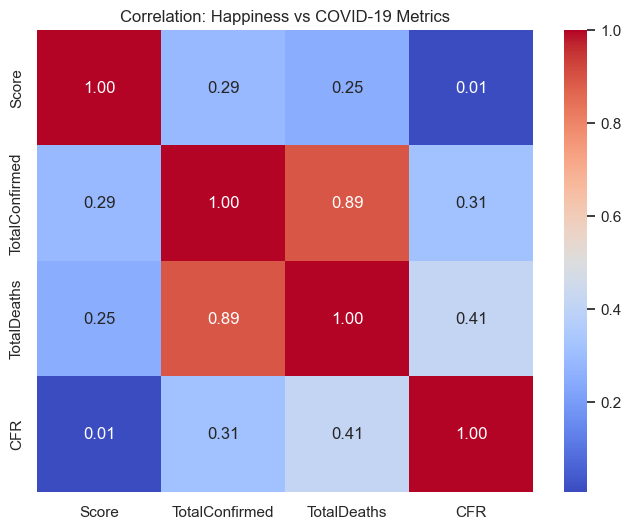

In [18]:
#visualizaion
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Happiness vs COVID-19 Metrics")
plt.show()

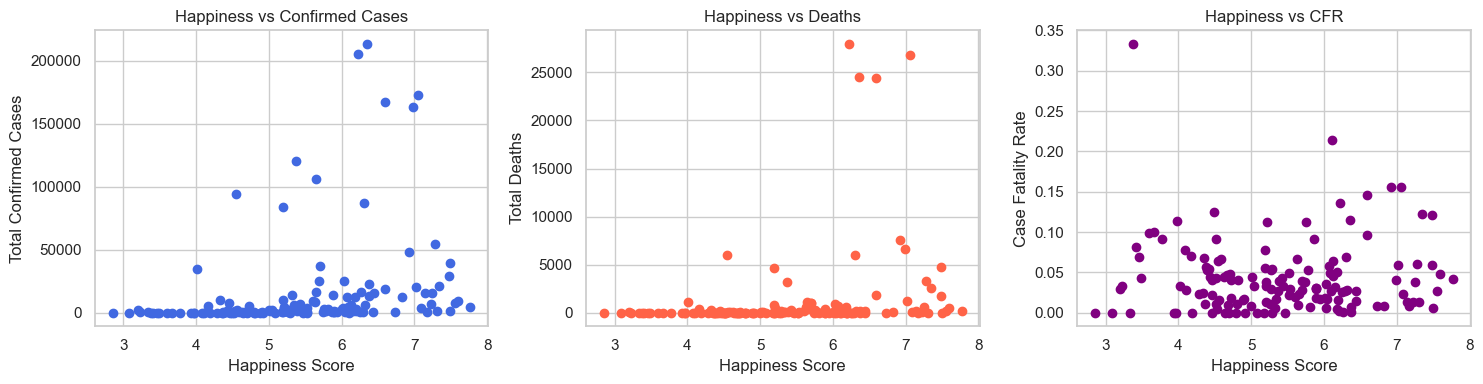

In [19]:
#Scatter Plot
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(merged[score_col], merged["TotalConfirmed"], color="royalblue")
plt.xlabel("Happiness Score")
plt.ylabel("Total Confirmed Cases")
plt.title("Happiness vs Confirmed Cases")

plt.subplot(1,3,2)
plt.scatter(merged[score_col], merged["TotalDeaths"], color="tomato")
plt.xlabel("Happiness Score")
plt.ylabel("Total Deaths")
plt.title("Happiness vs Deaths")

plt.subplot(1,3,3)
plt.scatter(merged[score_col], merged["CFR"], color="purple")
plt.xlabel("Happiness Score")
plt.ylabel("Case Fatality Rate")
plt.title("Happiness vs CFR")

plt.tight_layout()
plt.show()

In [20]:
print("\n KEY INSIGHTS:")
print("- If correlation between Happiness Score and COVID deaths is negative → happier countries had fewer deaths.")
print("- If correlation is positive → happier countries reported more cases (possibly due to more testing).")
print("- CFR correlation shows relationship between happiness and healthcare outcomes.")
print("\n Analysis Complete.")


 KEY INSIGHTS:
- If correlation between Happiness Score and COVID deaths is negative → happier countries had fewer deaths.
- If correlation is positive → happier countries reported more cases (possibly due to more testing).
- CFR correlation shows relationship between happiness and healthcare outcomes.

 Analysis Complete.
